## Import and warehouse data:
### Import all the given datasets and explore shape and size of each.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project2\\part2\\Part2 - Data1.csv')
df1 = pd.read_csv('C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project2\\part2\\Part2 -Data2.csv')

In [3]:
df.shape
#contains 8 columns

(5000, 8)

In [4]:
df1.shape
#contains 7 columns

(5000, 7)

## Both the dataset has ID ie: customer ID as the common column to merge with. By merging 2 dataset's we will have more columns (More features) to check for  relationship.

In [5]:
data = pd.merge(df,df1,how='inner',on='ID')
# For safety reasons we dont concatenate as the ID's might be jumbled in the middle, so we merge both the dataframes

In [6]:
data.shape
#Post merging we see 14 features

(5000, 14)

## Data cleansing:

In [7]:
# Explore and if required correct the datatypes of each attribute
#Over here we only see integers and floats which is an added advantage but we notice few null values in "LoanOnCard" column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [9]:
#Explore for null values in the attributes and if required drop or impute values.
#As mentioned above we notice Loan on Card having 20 missing null values

In [10]:
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [11]:
data['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [12]:
data.corr()['LoanOnCard'].sort_values(ascending=False)
# we notice that the highest spend correlates with Loan on Card but since we have around 5000 rows and only 20 rows are 
#of null values, we drop those rows

LoanOnCard             1.000000
HighestSpend           0.502626
MonthlyAverageSpend    0.366912
FixedDepositAccount    0.316131
Mortgage               0.141947
Level                  0.137010
HiddenScore            0.061761
Security               0.021982
InternetBanking        0.006034
CreditCard             0.002536
ZipCode                0.000120
CustomerSince         -0.007801
Age                   -0.008147
ID                    -0.027188
Name: LoanOnCard, dtype: float64

In [13]:
data1 = data.dropna(axis=0)
# Dropping the null 20 rows and creating a new Dataframe named data1

In [14]:
data1.isnull().sum()
#now we see no null values

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [15]:
data1.info()
#Also there is 4980 entries which is enough to train a model with 70% data (3486 rows - 70% for training and 1494 for testing)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


## Data analysis & visualisation:

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

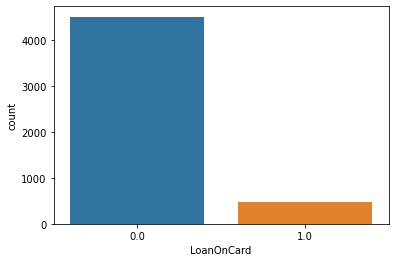

In [16]:
sns.countplot(data1['LoanOnCard'])
# completely imbalanced target class

In [17]:
data1.corr()['LoanOnCard'].sort_values(ascending=False)
#correlations on the LoanOnCard

LoanOnCard             1.000000
HighestSpend           0.502626
MonthlyAverageSpend    0.366912
FixedDepositAccount    0.316131
Mortgage               0.141947
Level                  0.137010
HiddenScore            0.061761
Security               0.021982
InternetBanking        0.006034
CreditCard             0.002536
ZipCode                0.000120
CustomerSince         -0.007801
Age                   -0.008147
ID                    -0.027188
Name: LoanOnCard, dtype: float64

### ID and Zipcode being the nominal type data has no role to play in prediction - dropping both


In [18]:
data1 = data1.drop(['ID','ZipCode'],axis=1)

In [19]:
data1.corr()['LoanOnCard'].sort_values(ascending=False)
#Strong relationship is found only on "Highest Spend", "Monthly average Spend", "FD Accountholders"

LoanOnCard             1.000000
HighestSpend           0.502626
MonthlyAverageSpend    0.366912
FixedDepositAccount    0.316131
Mortgage               0.141947
Level                  0.137010
HiddenScore            0.061761
Security               0.021982
InternetBanking        0.006034
CreditCard             0.002536
CustomerSince         -0.007801
Age                   -0.008147
Name: LoanOnCard, dtype: float64

# Data analysis & visualisation:

### Highest spend

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HighestSpend', ylabel='Density'>

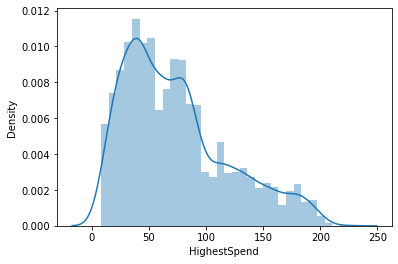

In [20]:
sns.distplot(data1['HighestSpend'])
#data is continuous and skewed

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HighestSpend'>

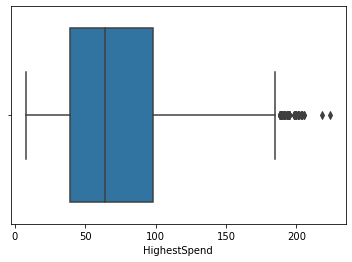

In [21]:
sns.boxplot(data1['HighestSpend'])
#data does have outliers

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='HighestSpend'>

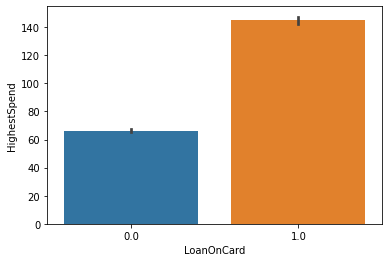

In [22]:
sns.barplot('LoanOnCard','HighestSpend',data=data1)
## In general When the highest spend value increases the tendency to take loan also increases

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='HighestSpend'>

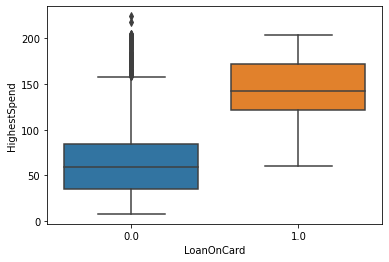

In [23]:
sns.boxplot('LoanOnCard','HighestSpend',data=data1)
# there are people who spend high but still end up not purchasing, this is an outlier in class 0.0 for loan on card
# Outliers tend to affect our prediction while making the model

### MonthlyAverageSpend:

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HighestSpend', ylabel='MonthlyAverageSpend'>

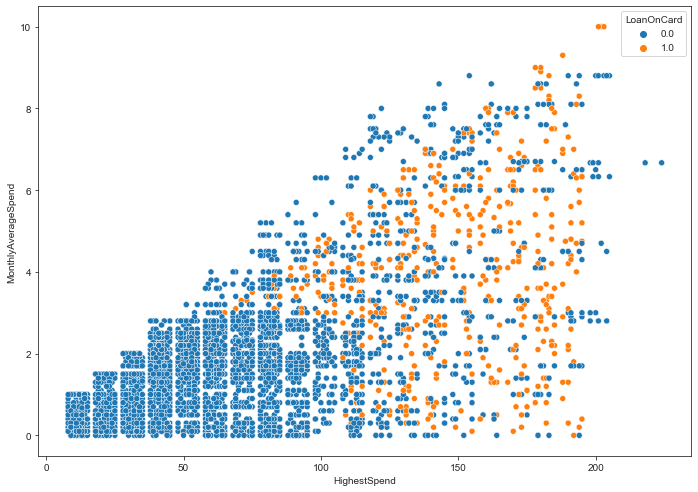

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data1['HighestSpend'],data1['MonthlyAverageSpend'],hue=data1['LoanOnCard'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='Density'>

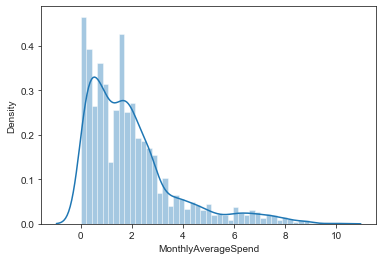

In [25]:
sns.distplot(data1['MonthlyAverageSpend'])
#data is continuous and skewed

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyAverageSpend'>

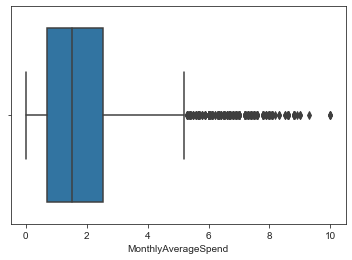

In [26]:
sns.boxplot(data1['MonthlyAverageSpend'])
# It holds a lot of outliers, we need to check the impact made by these outliers

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

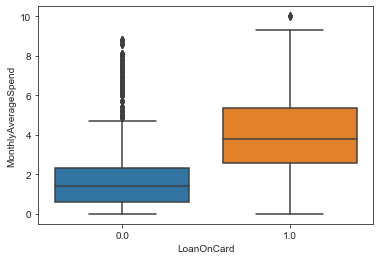

In [27]:
sns.boxplot('LoanOnCard','MonthlyAverageSpend',data=data1)
# there are people who have high monthly average spend but still end up not purchasing any loans, this outlier is displayed in class 0.0 for loan on card
# Outliers like these affect our prediction while making the model

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

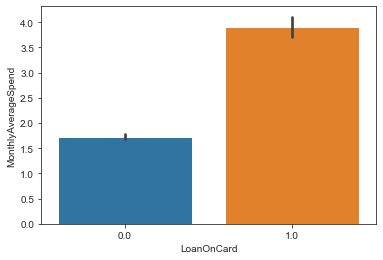

In [28]:
sns.barplot('LoanOnCard','MonthlyAverageSpend',data=data1)
## In general When the monthly average spend value increases the tendency to take loan also increases

## FixedDepositAccount

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

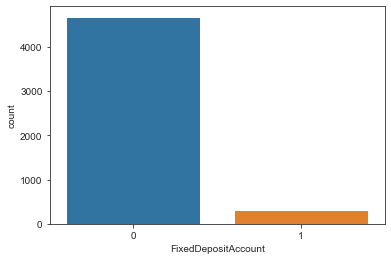

In [29]:
sns.countplot(data1['FixedDepositAccount'])
#Data is categorical

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='MonthlyAverageSpend'>

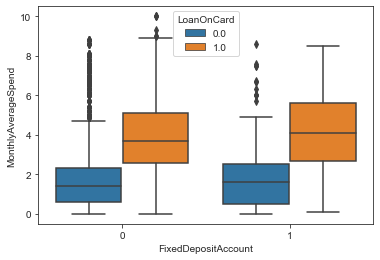

In [30]:
# Those who have more monthly average spend tend to 
sns.boxplot(x ='FixedDepositAccount', y ='MonthlyAverageSpend', data = data1, hue ='LoanOnCard') 

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='MonthlyAverageSpend'>

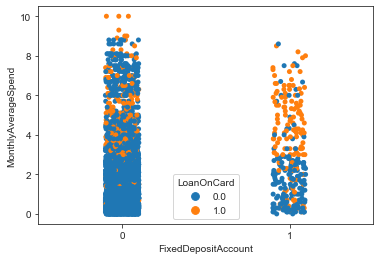

In [31]:
# Those who have FD account have more tendency to take loan if their monthly spend is also high, those who do not have FD account
# mostly don tend to get loans unless their monthly spend is high, in general FD account holders tend to get loans
sns.stripplot(x ='FixedDepositAccount', y ='MonthlyAverageSpend', data = data1, hue ='LoanOnCard') 

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='HighestSpend'>

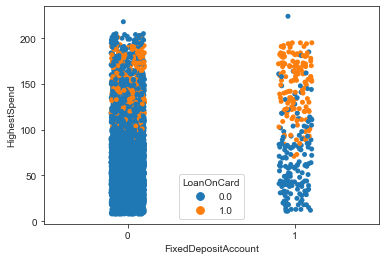

In [32]:
sns.stripplot(x ='FixedDepositAccount', y ='HighestSpend', data = data1, hue ='LoanOnCard') 

## Mortgage 

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='Mortgage'>

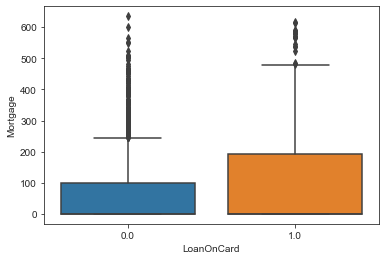

In [33]:
sns.boxplot('LoanOnCard','Mortgage',data=data1)

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mortgage', ylabel='HighestSpend'>

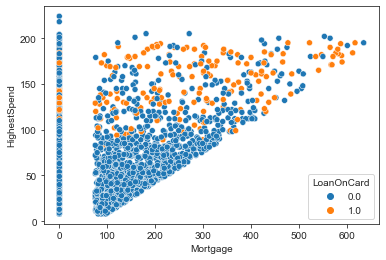

In [34]:
# sns.swarmplot('LoanOnCard','Mortgage',data=data1), hue ='LoanOnCard')
sns.scatterplot('Mortgage','HighestSpend', data = data1,hue='LoanOnCard') 
# sns.scatterplot('P_incidence','P_tilt',hue ='Class', data=dff)

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='Mortgage'>

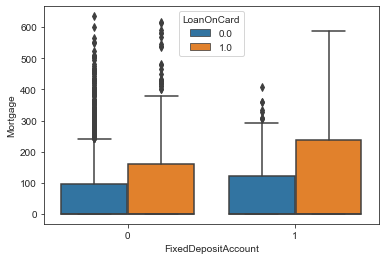

In [35]:
# This shows the people who mortgage end up getting loan but the level of difference the we find is less
sns.boxplot(x ='FixedDepositAccount', y ='Mortgage', data = data1, hue ='LoanOnCard') 

## Level

In [36]:
data1['Level'].unique()
#Categorical feature

array([3, 2, 1], dtype=int64)

<AxesSubplot:xlabel='Level', ylabel='HighestSpend'>

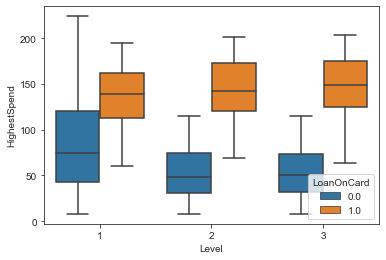

In [37]:
sns.boxplot(x ='Level', y ='HighestSpend', data = data1, hue ='LoanOnCard') 

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

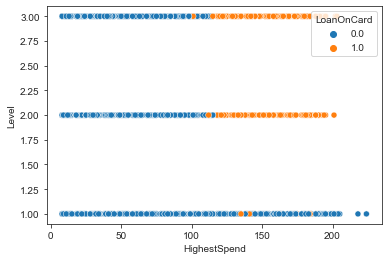

<Figure size 1600x800 with 0 Axes>

In [38]:
sns.scatterplot('HighestSpend','Level', data = data1,hue='LoanOnCard') 
plt.figure(figsize=(8,4), dpi=200)
# Those who spend more fall in level1 comparitively less spenders in level 2 and then 3 has the least spenders, out of this
# loan is mostly purchased by level 2 and level3 people

In [39]:
# HiddenScore,Security,InternetBanking,CreditCard,CustomerSince,Age - All these feature play a very lesser role as they
# are more correlated with the internal features, they can be used to discover new columns or fill missing columns

## Data pre-processing:

### Segregate predictors vs target attributes

In [40]:
X = data1.drop(['LoanOnCard','HiddenScore','Security','InternetBanking','CreditCard','CustomerSince','Age'],axis=1)
y = data1['LoanOnCard']

## Check for target balancing and fix it if found imbalanced

In [41]:
print(y.value_counts())

#Highly imbalanced - definetly needs a fix
# It can be fixed by using Precision (how many we predicted as postive and how many were actually
# positive), because we cannot afford to have False positive (predicting someone will return but actually they dont)
# and the other metric to look into is F1 score which is a tradeoff of both precision n recall
# by removing outliers that come under class 0 - it dint work displyed below
# Up sampling or downsampling but this was not taught not taking up this step - also XGboost can be used

num1 = 4500
num2 = 480

ratio12 = int(num1/num2)
print(f" The class 2 is {ratio12}times greater than class1 ")

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64
 The class 2 is 9times greater than class1 


## We know for a fact that class 0 being highly imbalanced contains a lot of outliers which we noticed  in line 23,26,29,32,34. We can eliminate these outliers which would help in creating better model and also reduces the imbalance inclasses

In [42]:
# Any observations that is 1.5 times more than Q3 or 1.5 times less than Q1, considered as outliers.

In [43]:
# drop unnecessary columns
data1 = data1.drop(['HiddenScore','Security','InternetBanking','CreditCard','CustomerSince','Age'],axis=1)

In [44]:
data1 = data1.sort_values('HighestSpend')
columns = ['HighestSpend','MonthlyAverageSpend','Mortgage']
#sort the data
def remove_outliers(x):
    for c in columns:
        Q1 = np.percentile(x[c],25)
        Q2 = np.percentile(x[c],50)
        Q3 = np.percentile(x[c],75)
        IQR = Q3-Q1
        lower_outliers = Q1 -(1.5 * IQR) 
        upper_outliers = Q3 +(1.5 * IQR) 
        print(f"For {c} :")
        print(f"The IQR is {IQR}")
        print(f"The value above {upper_outliers} and value below {lower_outliers} will be considered as outliers")
        print(data1[(data1[c]>upper_outliers)|(data1[c]<lower_outliers)]['LoanOnCard'].value_counts())
        print("\n \n")   

In [45]:
remove_outliers(data1)

For HighestSpend :
The IQR is 59.0
The value above 186.5 and value below -49.5 will be considered as outliers
0.0    54
1.0    42
Name: LoanOnCard, dtype: int64

 

For MonthlyAverageSpend :
The IQR is 1.825
The value above 5.262499999999999 and value below -2.0374999999999996 will be considered as outliers
0.0    199
1.0    125
Name: LoanOnCard, dtype: int64

 

For Mortgage :
The IQR is 101.0
The value above 252.5 and value below -151.5 will be considered as outliers
0.0    198
1.0     93
Name: LoanOnCard, dtype: int64

 



In [46]:
# Removing all the outliers will make the class even more worse, hence not proceeding with all outlier removal process
# we will have 4004 0.0 class and 317 1.0 class which is no good so we are not taking this method. We will remove the 
# outliers that belong to class 0 for now

In [47]:
def out_highspend(x):
    if x > 186.5 or x < -49.5:
        return np.nan
    else:
        return x

def out_MonthlyAverageSpend(x):
    if x> 5.26 or x < -2.03:
        return np.nan
    else:
        return x

def out_Mortgage(x):
    if x> 252.5 or x < -151.5:
        return np.nan
    else:
        return x

In [48]:
data1['out'] = data1['HighestSpend'].apply(out_highspend)

In [49]:
data1['out1'] = data1['MonthlyAverageSpend'].apply(out_MonthlyAverageSpend)

In [50]:
data1['out3'] = data1['Mortgage'].apply(out_Mortgage)

In [51]:
p = data1[data1['LoanOnCard']==0].dropna(axis=0)
#dropping the outliers where the class is 0

In [52]:
q = data1[data1['LoanOnCard']==1]

In [53]:
new_data = pd.concat([p,q])
new_data = new_data.drop(['out','out1','out3'],axis=1)

In [54]:
new_data['LoanOnCard'].value_counts()

0.0    4105
1.0     480
Name: LoanOnCard, dtype: int64

## Now we have very slightly balanced the classes from 4500:480 to 4105:480 by removing the outliers from class 0

## Perform train-test split.

In [55]:
X = new_data.drop('LoanOnCard',axis=1)
y = new_data['LoanOnCard']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
SS = StandardScaler()
XL = SS.fit_transform(X_train)
XLe = SS.transform(X_test)
X_train = pd.DataFrame(XL,columns = [X_train.columns])
X_test = pd.DataFrame(XLe,columns = [X_test.columns])

## Model training, testing and tuning:

In [58]:
LR = LogisticRegression()

In [59]:
LR.fit(X_train,y_train)

LogisticRegression()

In [60]:
LR.score(X_train,y_train)
#score of training data

0.9582424431287005

In [61]:
LR.score(X_test,y_test)
#score of testing data

0.965843023255814

In [62]:
prediction = LR.predict(X_test)

In [63]:
postpred = pd.DataFrame(prediction,columns = ['Predicted data'])

In [64]:
postpred['Actual data'] = y_test.values

In [65]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1233
         1.0       0.89      0.76      0.82       143

    accuracy                           0.97      1376
   macro avg       0.93      0.88      0.90      1376
weighted avg       0.96      0.97      0.96      1376



 # Classification Report - Explanation

## Usually we focus only on Precision and we see that class 0's precision is 97% which is good but class 1 precision is 89% which can be better

## F1 score being a tradeoff of both precision and recall can also be seen where it has 98% for class 0 and 82% for class 1

## In this case we focus more on Recall as the company's target is to increase conversion ratio, get more loaners and also we will see precission, he reason is that we cannot afford to incorrectly classify someone as positive (ie) we cannot incorrectly call a person as positive(to repay) whereas the person is actually No. This causes more loss to a banking sector, they can afford to loose someone who might pay the loan which causes a loss but they cannot afford to give loan to someone who is incorrectly classified as will pay

In [66]:
confusion_matrix(y_test,prediction)

array([[1220,   13],
       [  34,  109]], dtype=int64)

# Confusion Matrix Explanation

## In general we have 13 False Positives, which is not affordable(13 people were predicted to pay back the loan but actually they wont end up paying) - Precision is 97% for class 0 which is know as we have more data and 89% for class 1.0 which can be better

## we have 34 False Negatives, which is affordable. Here 34 people were predicted to no repay but whereas they actually repay.

## Naive bayes classifier - with discrete and continuous feature

In [67]:
nb1 = GaussianNB()
#Taking this model as we have continuous features as well

In [68]:
nb1.fit(X_train,y_train)

GaussianNB()

In [69]:
nb1.score(X_train,y_train)
#score for training data

0.923652228108445

In [70]:
nb1.score(X_test,y_test)
#score for testing data

0.9287790697674418

In [71]:
predictionnb = nb1.predict(X_test)
postprednb = pd.DataFrame(predictionnb,columns = ['Predicted data'])
postprednb['Actual data'] = y_test.values

In [72]:
print(classification_report(y_test,predictionnb))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1233
         1.0       0.63      0.76      0.69       143

    accuracy                           0.93      1376
   macro avg       0.80      0.85      0.82      1376
weighted avg       0.94      0.93      0.93      1376



In [73]:
confusion_matrix(y_test,predictionnb)

array([[1170,   63],
       [  35,  108]], dtype=int64)

## Classification Report and Confusion matrix look bad for NB with Precision for class 1.0 being low. Also we are not sure about tuning guassian NB model and hence we will not choose Guassian NB

# Apply  all  the  possible  tuning  techniques  to  train  the  best  model  for  the  given  data.  Select  the final  best  trained  model  with your comments for selecting this model.

## Changing the threshold for Logistic Regression

In [74]:
T = [0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]
for n in T:
    print(f" For threshold in {n}")
    THRESHOLD = n
    preds = np.where(LR.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    print(classification_report(y_test,preds))
    print("\n")
    print(confusion_matrix(y_test,preds))
    print("\n")

 For threshold in 0.45
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1233
         1.0       0.88      0.80      0.84       143

    accuracy                           0.97      1376
   macro avg       0.93      0.89      0.91      1376
weighted avg       0.97      0.97      0.97      1376



[[1217   16]
 [  29  114]]


 For threshold in 0.46
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1233
         1.0       0.88      0.79      0.83       143

    accuracy                           0.97      1376
   macro avg       0.93      0.89      0.91      1376
weighted avg       0.97      0.97      0.97      1376



[[1218   15]
 [  30  113]]


 For threshold in 0.47
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1233
         1.0       0.89      0.78      0.83       143

    accuracy                           0.97      13

## The threshold of 0.55 has the FN reduced to 9 , increasing Precision for class 1.0 to 92% - This seems to be a better threshold for Logistic regression as we can afford 37 FP. 

## If the company is focused on reducing the FN, then we should increase the threshold to 0.85 (shown below)  leading to 0 FN but we will also loose more FP, from above 0.55 threshold strikes a balance in general.

In [75]:
# For eg: threshold of 0.85 completely reduces the FN but we end up having 65 FP
print(f" For threshold in {n}")
THRESHOLD = 0.85
preds = np.where(LR.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(y_test,preds))
print("\n")
print(confusion_matrix(y_test,preds))
print("\n")

 For threshold in 0.6
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1233
         1.0       0.99      0.55      0.70       143

    accuracy                           0.95      1376
   macro avg       0.97      0.77      0.84      1376
weighted avg       0.95      0.95      0.95      1376



[[1232    1]
 [  65   78]]




## Trying Random under sampling to balance out class

In [122]:
data2.drop(['ID','ZipCode'],axis=1,inplace=True)

C:\Users\kragha\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
class_0,class_1 = data2['LoanOnCard'].value_counts()

In [151]:
class_0_df = data2[data2['LoanOnCard'] == 0]
class_1_df = data2[data2['LoanOnCard'] == 1]

In [152]:
df_class_0_under = class_0_df.sample(class_1)
New_df = pd.concat([df_class_0_under, class_1_df], axis=0)

# print('Random under-sampling:')
# print(df_test_under.target.value_counts())

# df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [155]:
New_df['LoanOnCard'].value_counts()
#balanced the classes

1.0    480
0.0    480
Name: LoanOnCard, dtype: int64

In [156]:
X = New_df.drop('LoanOnCard',axis=1)
y = New_df['LoanOnCard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Post train test split - balanced classes

In [160]:
y_train.value_counts()

0.0    339
1.0    333
Name: LoanOnCard, dtype: int64

In [161]:
y_test.value_counts()

1.0    147
0.0    141
Name: LoanOnCard, dtype: int64

## Logistic Regression

In [165]:
LR_balanced = LogisticRegression()

In [166]:
LR_balanced.fit(X_train,y_train)

LogisticRegression()

In [168]:
balanced_pred = LR_balanced.predict(X_test)

In [169]:
postpred_balanced = pd.DataFrame(balanced_pred,columns = ['Predicted data'])

In [172]:
postpred_balanced['Actual'] = y_test.values

In [186]:
T = [0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]
for n in T:
    print(f" For threshold in {n}")
    THRESHOLD = n
    preds = np.where(LR_balanced.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    print(classification_report(y_test,preds))
    print("\n")
    print(confusion_matrix(y_test,preds))
    print("\n")

 For threshold in 0.45
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       141
         1.0       0.91      0.95      0.93       147

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288



[[127  14]
 [  8 139]]


 For threshold in 0.46
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       141
         1.0       0.91      0.94      0.92       147

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288



[[127  14]
 [  9 138]]


 For threshold in 0.47
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       141
         1.0       0.91      0.93      0.92       147

    accuracy                           0.92       288
   ma

## In case of balanced classes in Logistic regression, we choose threshold of 0.45 to get better Precision, recall on both classes and also better F1 Score

In [174]:
print(classification_report(y_test,balanced_pred))
confusion_matrix(y_test,balanced_pred)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       141
         1.0       0.92      0.92      0.92       147

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288



array([[129,  12],
       [ 12, 135]], dtype=int64)

## NAive BAyes

In [175]:
nb_balanced = GaussianNB()

In [177]:
nb_balanced.fit(X_train,y_train)

GaussianNB()

In [179]:
balanced_pred_nb = nb_balanced.predict(X_test)

In [180]:
nb_df = pd.DataFrame(balanced_pred_nb,columns=['Predicted'])

In [183]:
nb_df['Actual'] = y_test.values

In [185]:
print(classification_report(y_test,balanced_pred_nb))
confusion_matrix(y_test,balanced_pred_nb)

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       141
         1.0       0.92      0.84      0.88       147

    accuracy                           0.88       288
   macro avg       0.88      0.88      0.88       288
weighted avg       0.89      0.88      0.88       288



array([[131,  10],
       [ 24, 123]], dtype=int64)

## I will choose Logistic regression, post removing the outliers for class 0 with threshold of 0.55 which is ideally giving a better result compared to other threshold values of Logistic model and also compared with NB

## We can try to group data using ZIP code and take sum of Loan status, the loans that were 1 will add up to a higher value. I noticed 2 ZIP codes having around 13 - 14 people with 1, we can create dummies using these ZIP codes. For eg Zipcode 1 and Zip code 2 totally contributes to 20 Loan on Card, then we can change those 2 zip codes to 1 and the rest to 0. This might help boosting the model as there might be some Posh areas where people have high salaries, might take loans and definetly repay

## IDeally Age should show a relationship to paying back the loan but in this data set i never found a relationship. We can may be pull range of Ages say 20 - 30, 31 - 41 and then find their relationship to paying back and then create a column as well

## Its also better to get a domain expertise to understand certain columns inside as we are unsure as to what they mean to getting loans or not. Post the domain expertise explanation, we can either transform the columns to new columns or use them accordingly